Программа получает на вход файлы из папки, в которых содержатся данные для построения графиков, отрисовывает каждый график и по надобности сохраняет его. Дополнительно увеличение по временному масштабу 100 нс, 1 мкс, 10 мкс.  
_______
**Названия рисунков**  
AAA.A_CCC_D_E_10us.png 
AAA.A – Толщина образца и порядковый номер (400.1)  
BBBBBB – День эксперимента  - день месяц год(060924)  
CCC – Номер эксперимента (001)  
D – Количество импульсов(1)  
E – Энергия в импульсе нДж (5)  
F - Увеличение(10us)  
____
**Пример** получившегося названия:  
400.1.060924.001.1.5.png

#### Задачи:
- Название файлов
- Перевод в Вт
- Обрабатывать новые файлы в режиме реального времени
- Inf/Nan - исправить

In [ ]:
!pip install pandas matplotlib openpyxl scipy

Tek090_ALL.csv


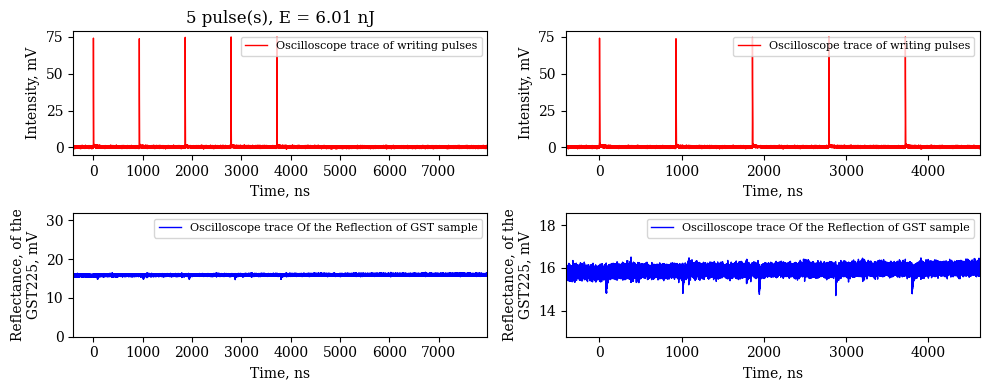

Tek123_ALL.csv


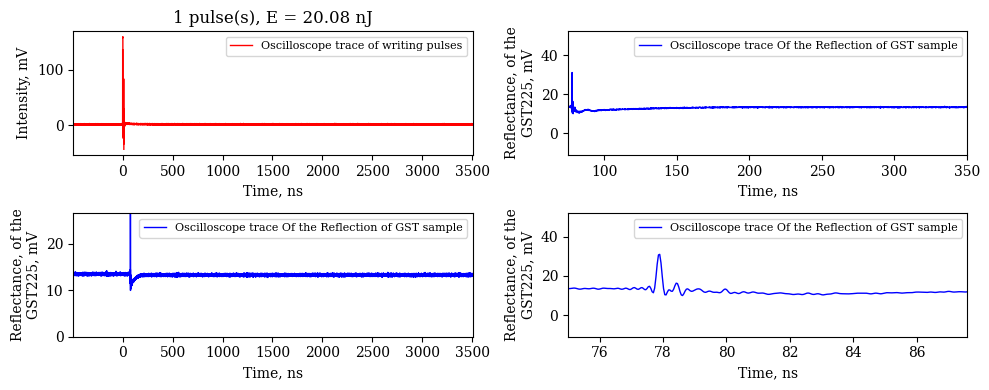

shot11.csv


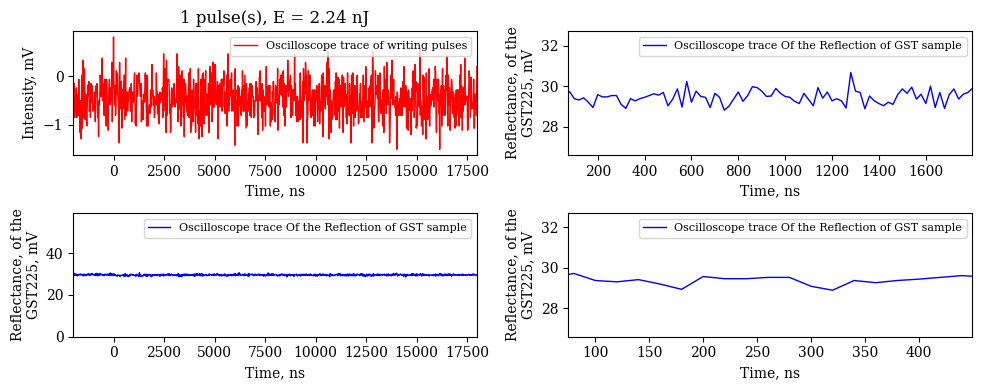

shot12.csv


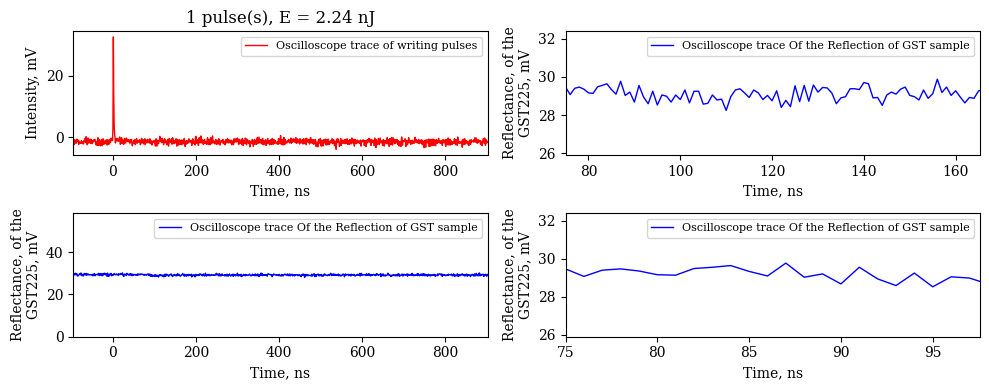

shot13.csv


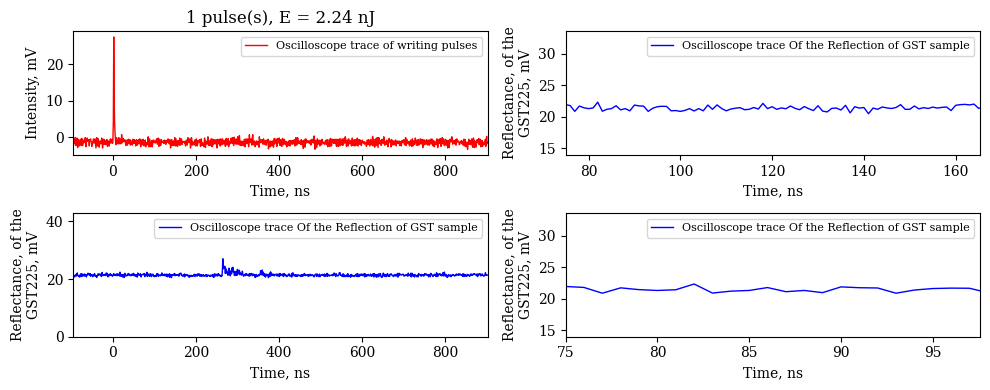

shot14.csv


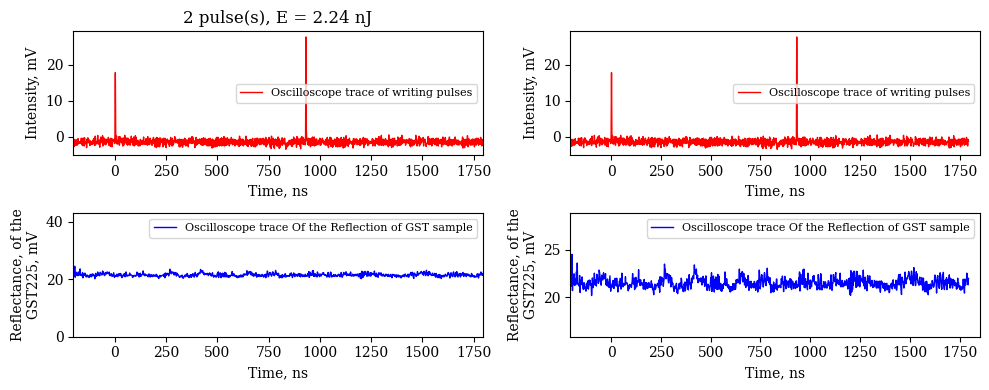

shot15.csv


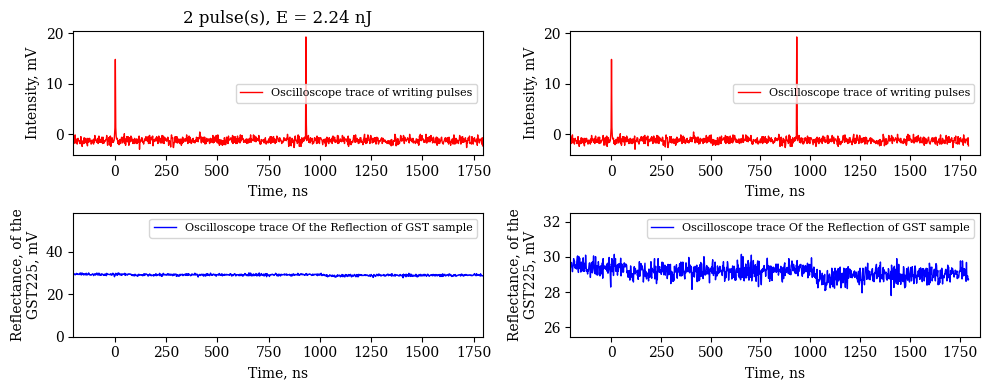

shot16.csv


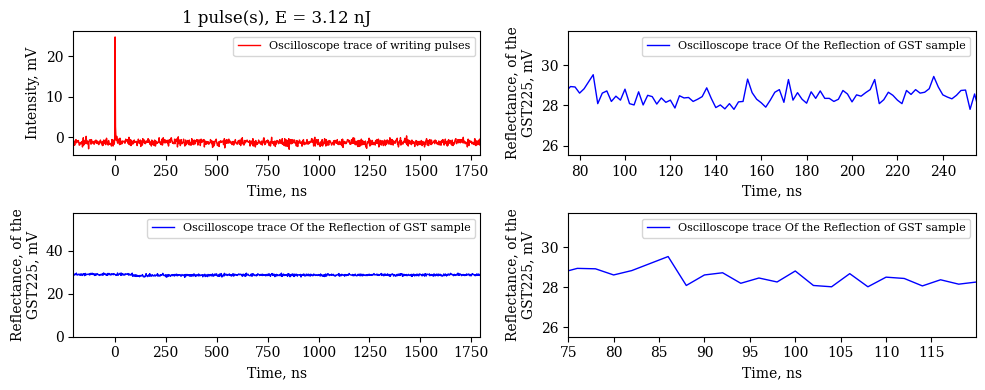

shot17.csv


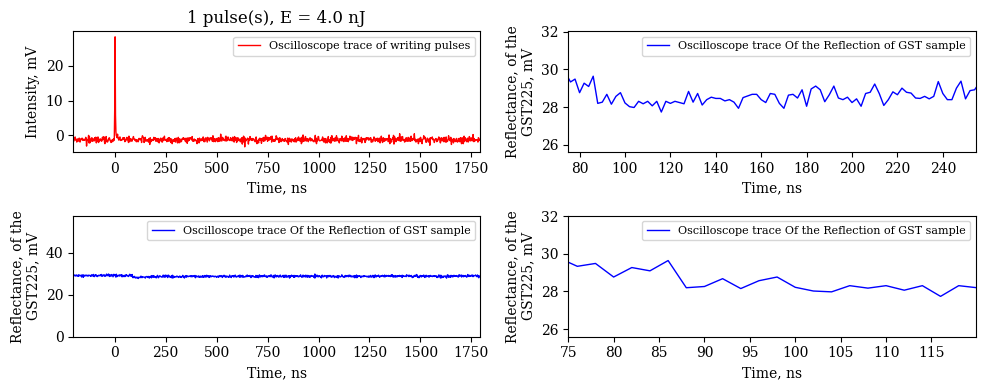

shot18.csv


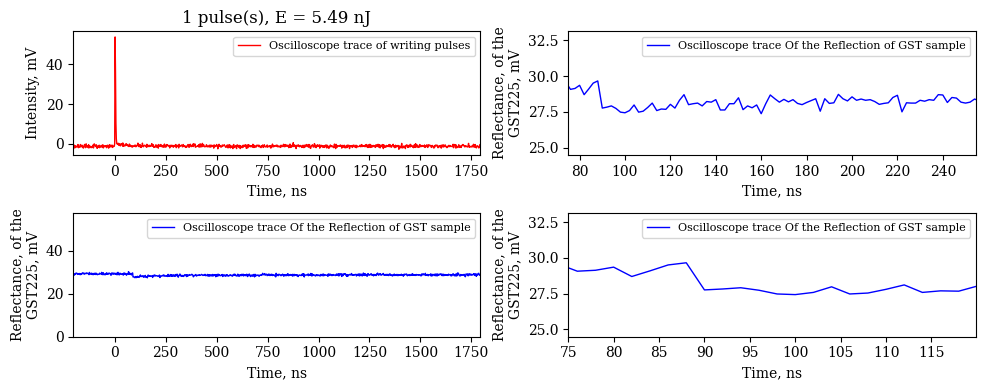

shot19.csv


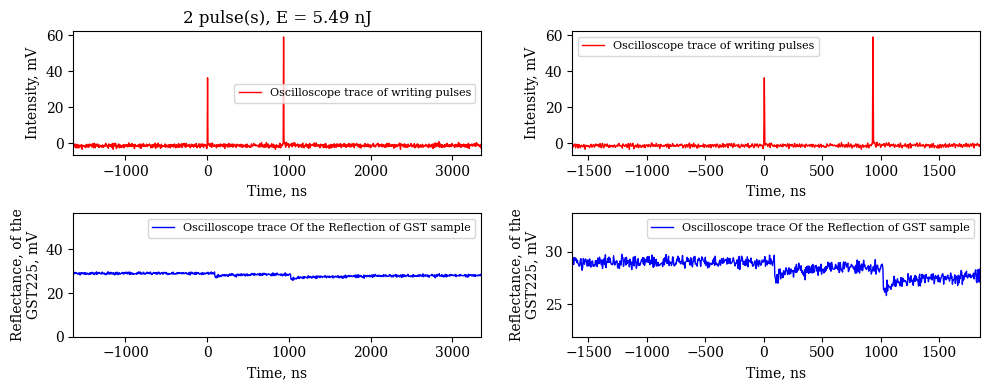

shot20.csv


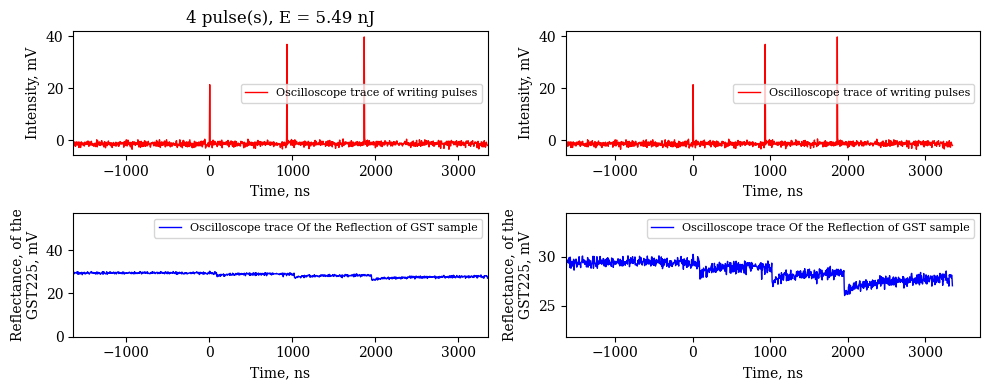

shot21.csv


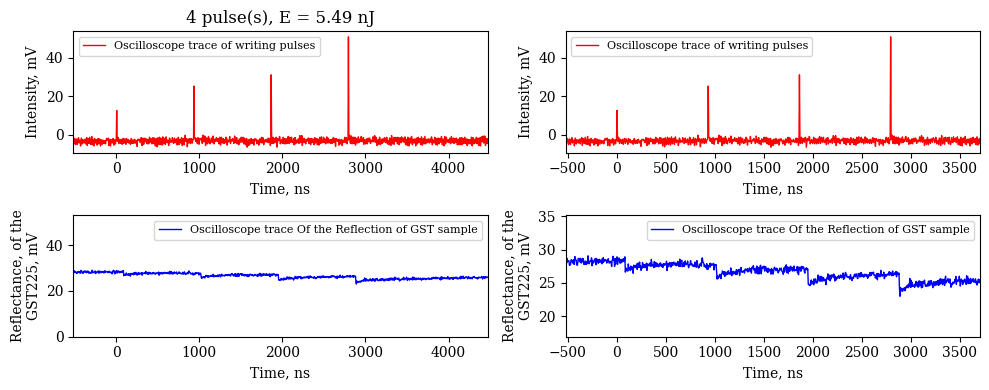

shot22.csv


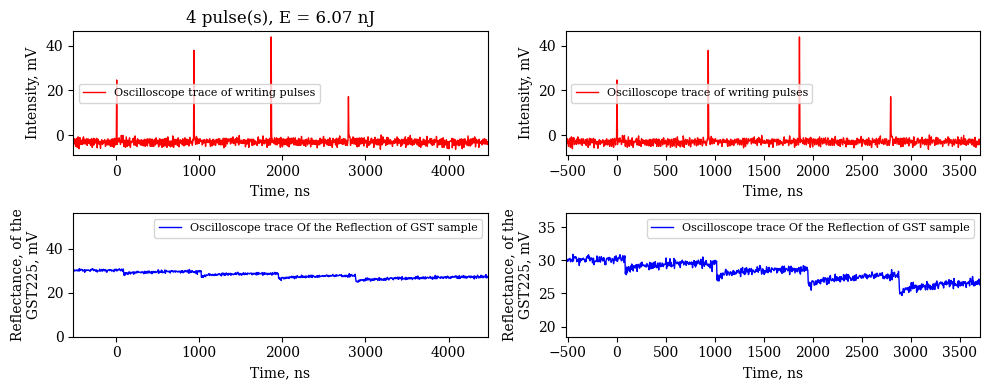

shot23.csv


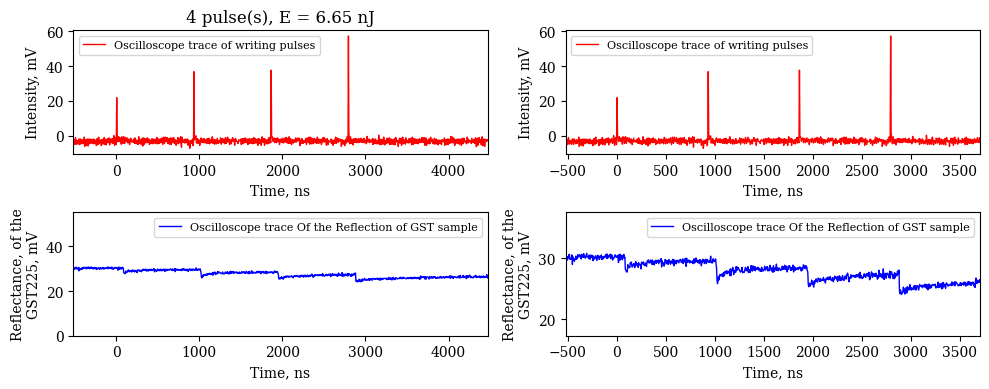

shot24.csv


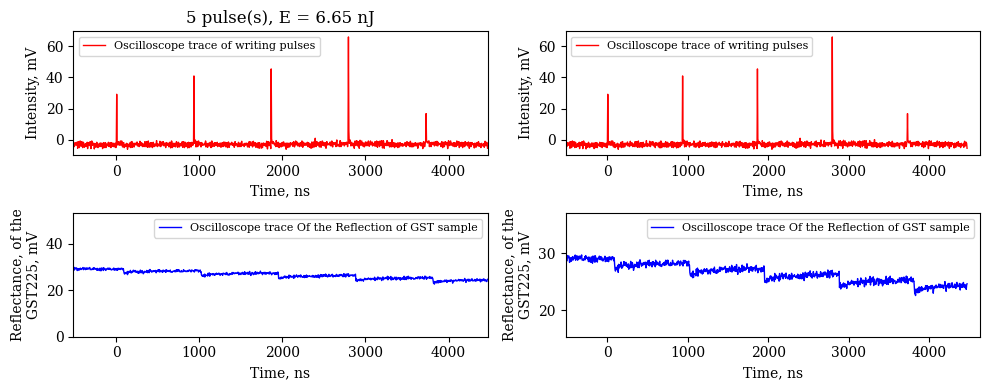

shot25.csv


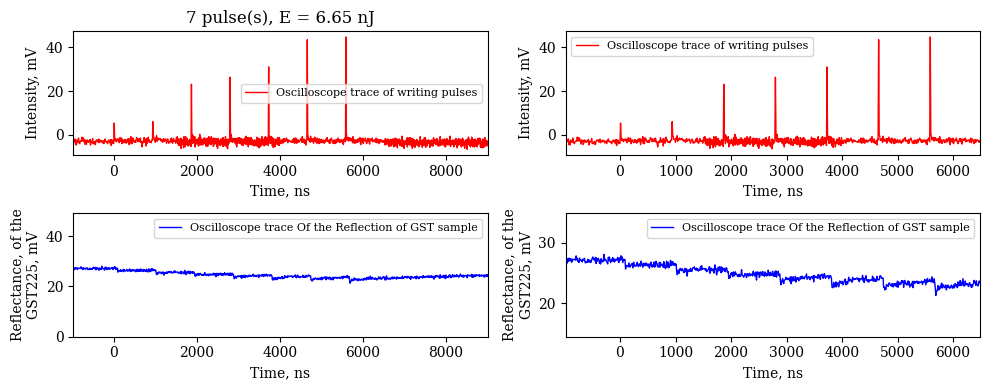

shot26.csv


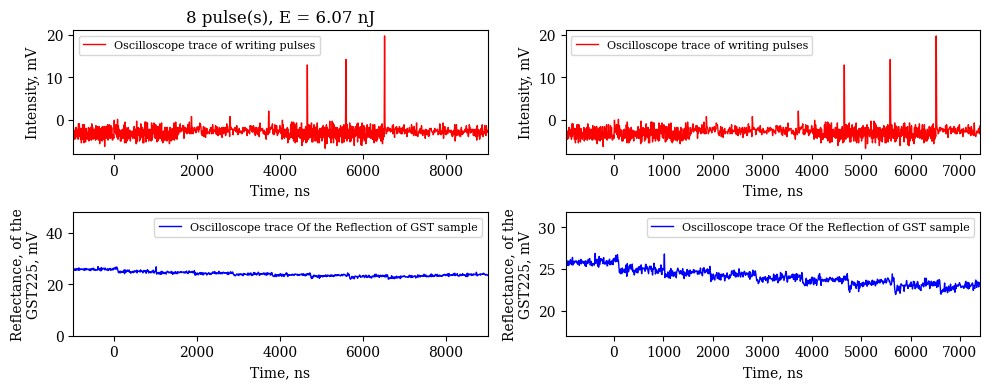

shot27.csv


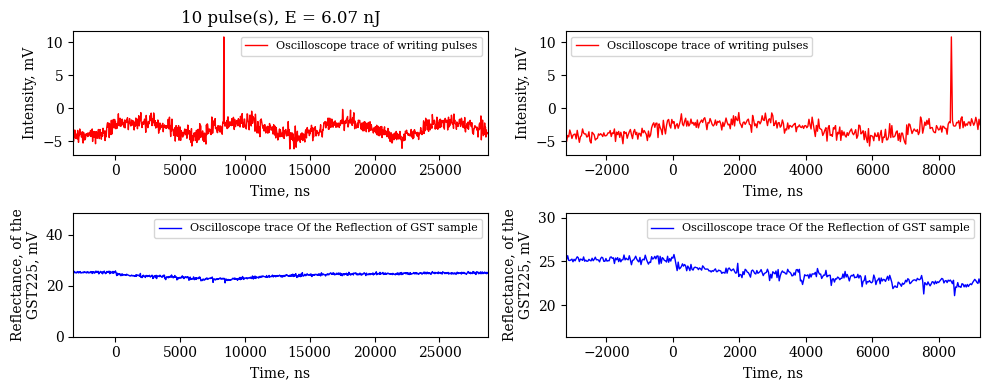

shot28.csv


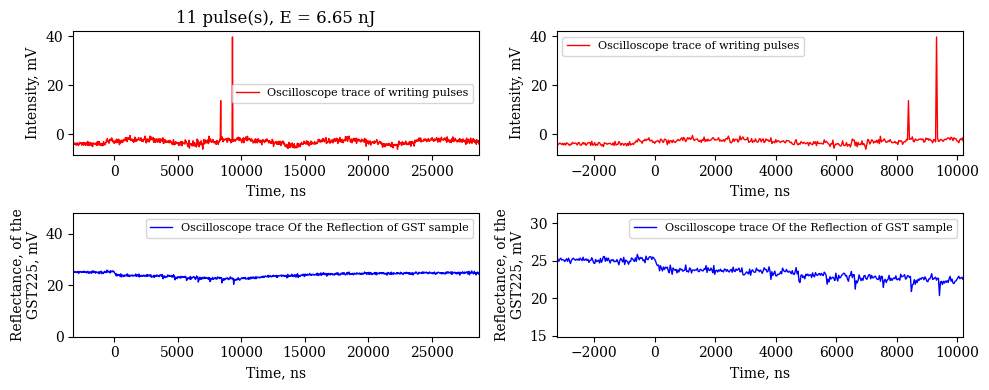

shot29.csv


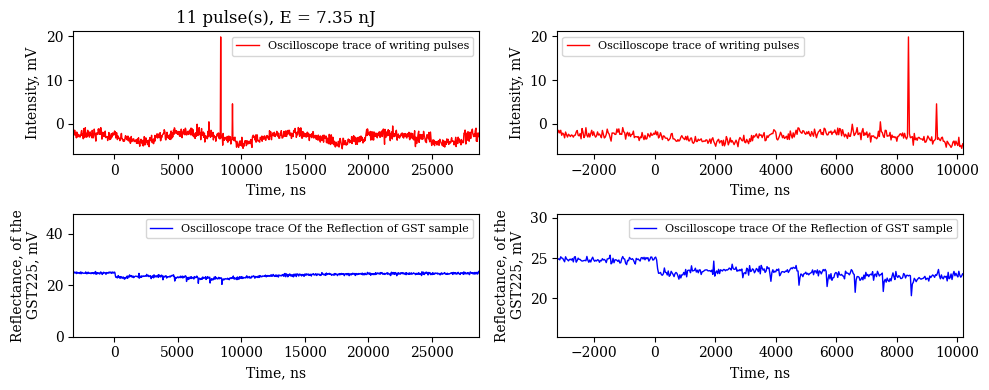

shot30.csv


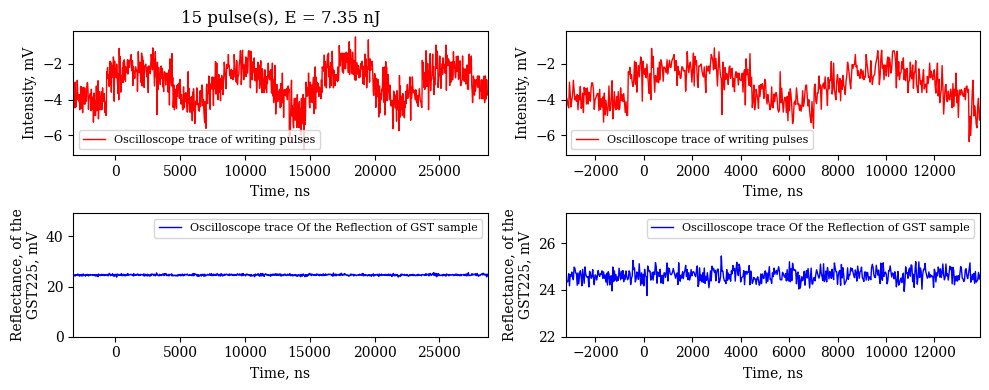

shot31.csv


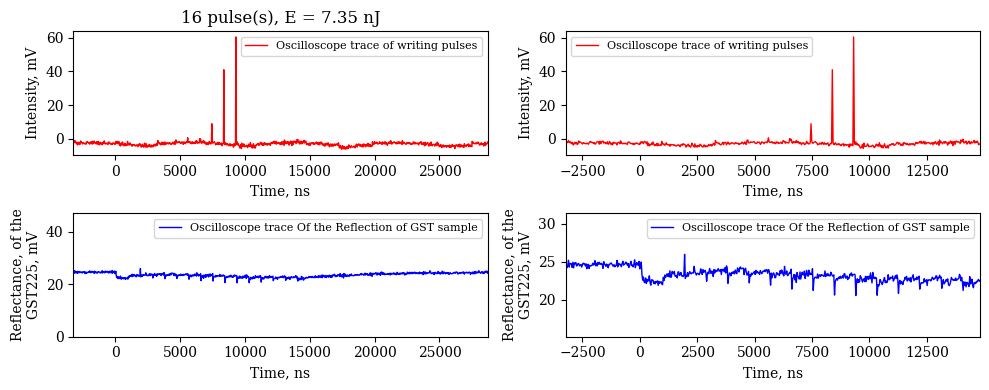

shot32.csv


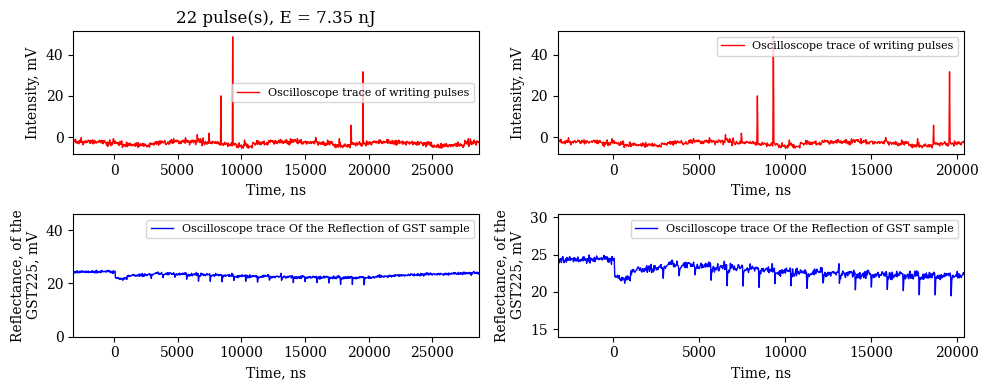

shot33.csv


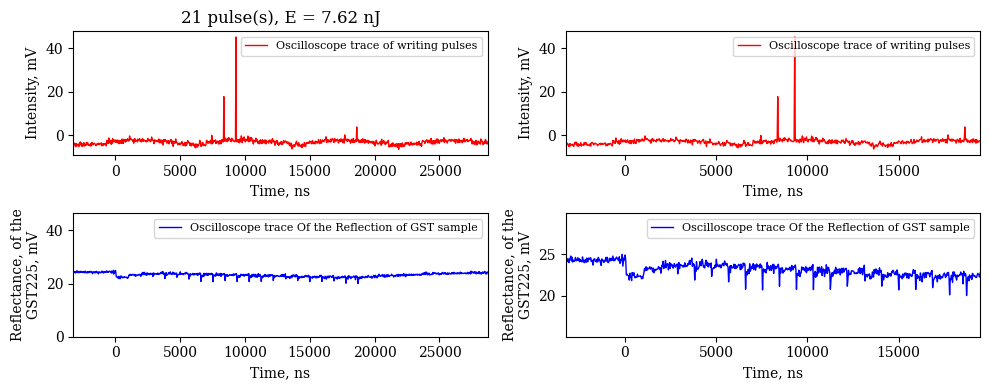

shot35.csv


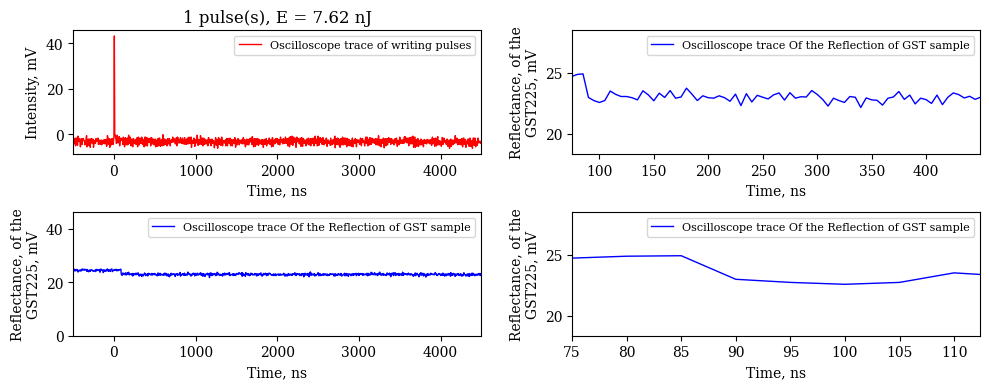

shot36.csv


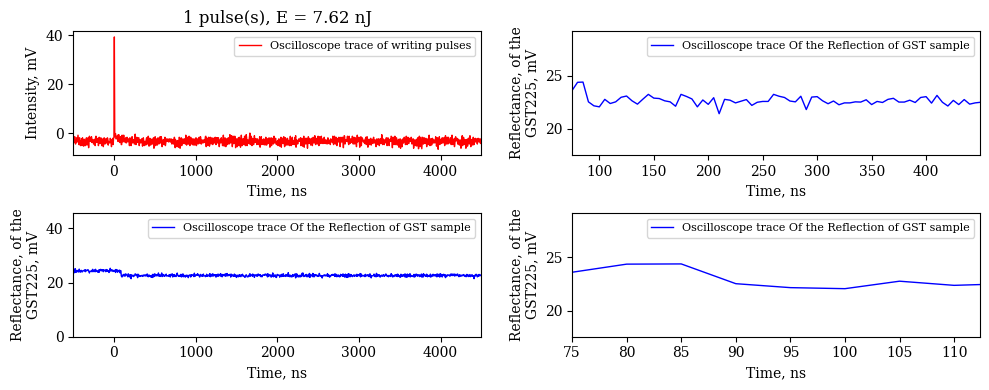

shot37.csv


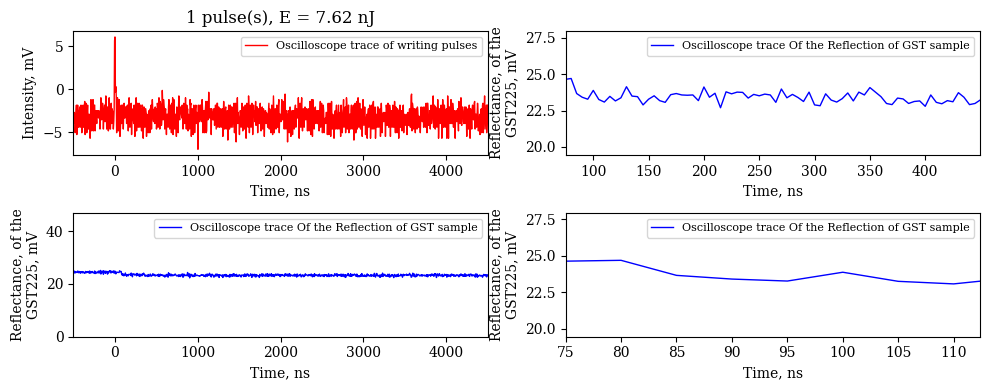

shot38.csv


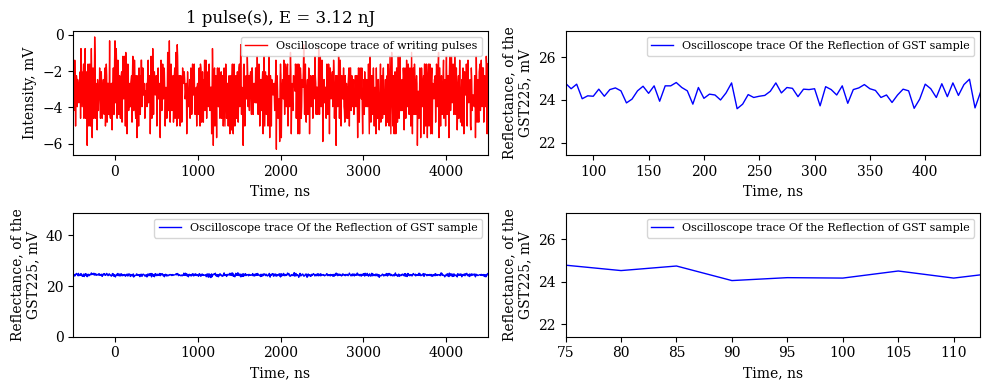

shot39.csv


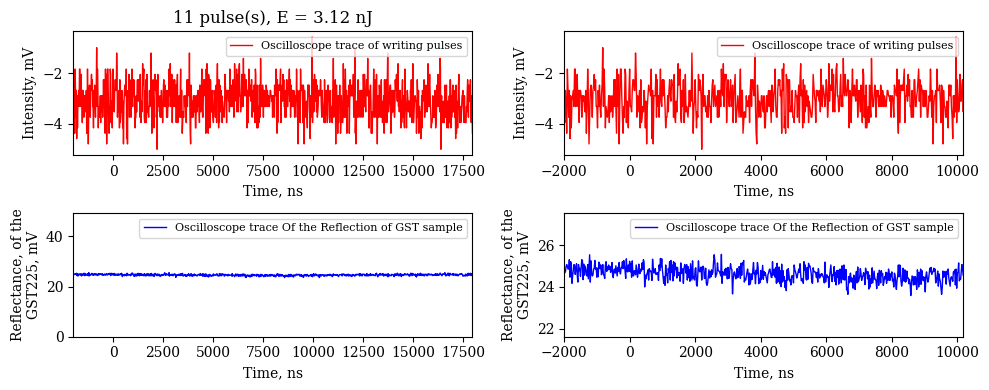

shot40.csv


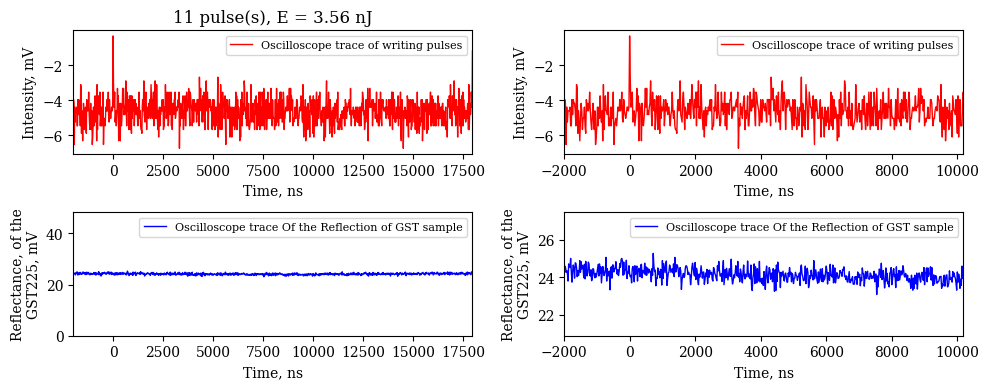

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np
from scipy.signal import find_peaks 

start_file = None
# start_file = 'shot18.csv' # Rigol
# start_file = 'Tek012.csv' # Tektronix

# dir = 'waveforms/110924/' # папка с осциллограммами
dir = 'waveforms/060924/Осциллограммы переходов/' # папка с осциллограммами
general_file = 'waveforms/060924/General.xlsx'
files = sorted(os.listdir(dir))

csv_files_all = [file for file in files if (file.endswith('.csv'))]
csv_files = [file for file in csv_files_all if (file.startswith('shot') or file.startswith('Tek'))]

df_gen = pd.read_excel(general_file)
col_index = df_gen.columns.get_loc('Общая энергия, нДж')
df_gen = df_gen.iloc[:, :col_index+1]

def plot_graph(x, y, color_, label_, ylabel, xlabel, xlim1, xlim2, increase, x2_supplement):
    plt.xlim(xlim1, xlim2/increase + x2_supplement)
    plt.ylabel(ylabel, fontsize=10)
    plt.xlabel(xlabel, fontsize=10)
    plt.plot(df[x]*1e9, df[y]*1e3, color=color_, linewidth=1,
             label=label_)
    plt.legend(fontsize=8)


def plot_graphics(pulses, energy, flag_pulse, peak, x2_supplement):
    plt.figure(figsize=(10, 4))
    plt.rcParams["font.family"] = "serif" # font

    # 1) Без увеличения
    plt.subplot(2, 2, 1)
    plot_graph(x='TIME', y='CH1', color_='red', 
        label_='Oscilloscope trace of writing pulses', 
        ylabel='Intensity, mV', xlabel='Time, ns', 
        xlim1=df.iloc[0, 0]*1e9, xlim2=df.iloc[-1, 0]*1e9, increase=1, x2_supplement=0)
    plt.title(label= f'{pulses} pulse(s), E = {energy} nJ')


    plt.subplot(2, 2, 3)
    plot_graph(x='TIME', y='CH2', color_='blue', 
        label_='Oscilloscope trace Of the Reflection of GST sample', 
        ylabel=r'Reflectance, of the' + '\n' +'GST225, mV', xlabel='Time, ns', 
        xlim1=df.iloc[0, 0]*1e9, xlim2=df.iloc[-1, 0]*1e9, increase=1, x2_supplement=0)
    plt.ylim(0, y_avg*1e3*2)


    # 2) Увеличение
    plt.subplot(2, 2, 2)
    if (flag_pulse=='one'):
        plot_graph(x='TIME', y='CH2', color_='blue', 
            label_='Oscilloscope trace Of the Reflection of GST sample', 
            ylabel=r'Reflectance, of the' + '\n' +'GST225, mV', xlabel='Time, ns', 
            xlim1=75, xlim2=(df.iloc[-1, 0]*1e9), increase=10, x2_supplement=x2_supplement)
        plt.ylim(y_start*1e3, y_end*1e3)
        
    else:
        plot_graph(x='TIME', y='CH1', color_='red', 
            label_='Oscilloscope trace of writing pulses', 
            ylabel='Intensity, mV', xlabel='Time, ns', 
            xlim1=df.iloc[0, 0]*1e9, xlim2=df.iloc[peak, 0]*1e9+926, increase=1, x2_supplement=0)


    # 3) Увеливение
    plt.subplot(2, 2, 4)
    if (flag_pulse=='one'):
        xlim1_ = 75
        xlim2_ = df.iloc[-1, 0]*1e9
        increase_ = 40
        x2_supp = x2_supplement
    else:
        xlim1_ = df.iloc[0, 0]*1e9
        xlim2_ = df.iloc[peak, 0]*1e9+926
        increase_ = 1
        x2_supp = 0

    plot_graph(x='TIME', y='CH2', color_='blue', 
        label_='Oscilloscope trace Of the Reflection of GST sample', 
        ylabel=r'Reflectance, of the' + '\n' +'GST225, mV', xlabel='Time, ns', 
        xlim1=xlim1_, xlim2=xlim2_, increase=increase_, x2_supplement=x2_supp)
    plt.ylim(y_start*1e3, y_end*1e3)


    plt.tight_layout()  # Автоматическая регулировка расстояния между графиками
    

# Узнаем номер снимка
def osc_number(file):
    if ('Tek' in file):
        exp_number = file.replace('Tek', '')
        exp_number = exp_number.replace('.csv', '')
        exp_number = exp_number.replace('_ALL', '')
    else:
        exp_number = file.replace('shot', '')
        exp_number = exp_number.replace('.csv', '')

    return int(exp_number)


def last_peak(df, pulses):
    time = 926 *1e-9 * (pulses - 1)
    idx_nearest_time =  (df['TIME'] - time).abs().idxmin()
    return idx_nearest_time


start_index = csv_files.index(start_file) if start_file is not None else 0
for file in csv_files[start_index:]:
    path = dir + file

    # Для пропуска любой "Шапки" файла
    f = open(path, 'r')
    lines = f.readlines()
    skip_lines = next(i for i, line in enumerate(lines) 
                  if 'TIME' in line or 'Time(s)' in line)
    f.close()

    # Номер эксперимента, кол-во импульсов, энергия
    num = osc_number(file)
    pulses = df_gen.loc[df_gen['Shot'] == num, 'Количество'].iloc[0]
    energy = round(df_gen.loc[df_gen['Shot'] == num, 
                              'Энергия, нДж'].iloc[0], 2)
    
    flag_pulse = 'many' if pulses > 1 else 'one' 
    

    column_names = ['TIME', 'CH1', 'CH2', 'CH3']
    df = pd.read_csv(path, skiprows=skip_lines+1, header=None, names=column_names)
    df = df.drop('CH3', axis=1)
    df.replace(np.inf, np.nan, inplace=True) # Если есть значения Inf
    df.replace(-np.inf, 0.000000001212, inplace=True)

    diff = df['CH2'].max()-df['CH2'].min()
    y_start = df['CH2'].min() - diff
    y_end = df['CH2'].max() + diff
    y_avg = df['CH2'].mean()

    x2_supplement = 0 if (df.iloc[-1, 0]*1e9 / 40 > 75) else 75

    df.replace(np.nan, np.inf, inplace=True) # Если есть значения Inf
    df.replace(0.000000001212, -np.inf, inplace=True)

    if (flag_pulse == 'many'):
        peak = last_peak(df, pulses)
    

    print(file)
    plot_graphics(pulses, energy, flag_pulse, peak, x2_supplement)
    plt.show()
    
    
    # save = input('Save?(y or n): ')
    # if(save == 'y'): 
    #     plot_graphics(pulses, energy)
    #     plt.savefig('013.png', dpi=300, bbox_inches='tight')

    # plt.close()

    